#### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

#### Abhishek Singh

## Libraries

In [84]:
import pandas as pd
import numpy as  np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn  as  sns

# Load Data

In [56]:
df = pd.read_csv('C:/Users/sony/Desktop/Spark_Foundation/task2/Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [9]:
df.describe().T #proper distributed data

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [11]:
df.isna().sum().sum()

0

# Visualization

In [12]:
from pandas_visual_analysis import VisualAnalysis

In [21]:
VisualAnalysis(df.iloc[:,1:6])

# Scalling

In [57]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
df = df.drop(['Id','Species'],axis=1)
mms.fit(df)
data_transformed = mms.transform(df)

# Find the optimum number of clusters


In [80]:
# Using silhouette_score and Elbow methode

For n_clusters = 2 The average silhouette_score is : 0.6808136202936815
For n_clusters = 3 The average silhouette_score is : 0.5525919445499755
For n_clusters = 4 The average silhouette_score is : 0.49782569010954686
For n_clusters = 5 The average silhouette_score is : 0.48851755088862747
For n_clusters = 6 The average silhouette_score is : 0.36820569682713056
For n_clusters = 7 The average silhouette_score is : 0.3553790560401651
For n_clusters = 8 The average silhouette_score is : 0.3651645360269738
For n_clusters = 9 The average silhouette_score is : 0.32883150368756503


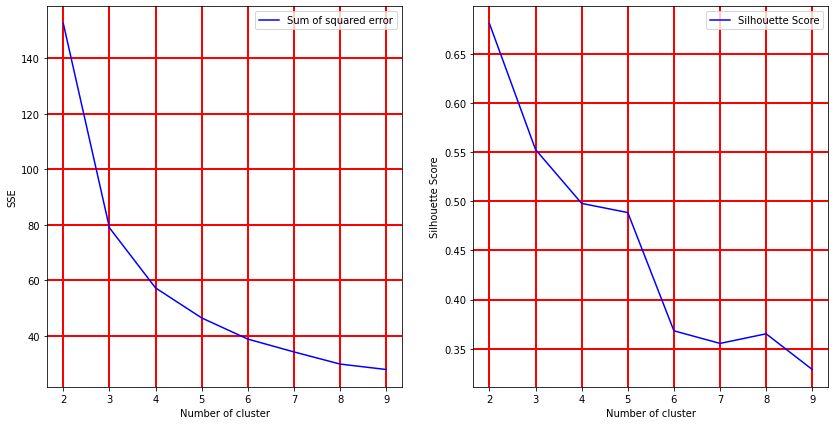

In [58]:
elbow = []
ss = []
for n_clusters in range(2,10):
    #iterating through cluster sizes
    clusterer = KMeans(n_clusters = n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(df)
    #Finding the average silhouette score
    silhouette_avg = silhouette_score(df, cluster_labels)
    ss.append(silhouette_avg)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
   #Finding the average SSE"
    elbow.append(clusterer.inertia_) # Inertia: Sum of distances of samples to their closest cluster center
fig = plt.figure(figsize=(14,7))
fig.add_subplot(121)
plt.plot(range(2,10), elbow,'b-',label='Sum of squared error')
plt.grid(which='major',color='r', linestyle='-', linewidth=2)
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.legend()
fig.add_subplot(122)
plt.plot(range(2,10), ss,'b-',label='Silhouette Score')
plt.grid(color='r', linestyle='-', linewidth=2)
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.legend()
plt.show()

# Modelling

In [59]:
# elbow 3-4 detect so no of cluster 3
kmeans = KMeans(n_clusters=3,random_state=2020)

In [60]:
#Fit kmeans model
kmeans.fit(df)
unq,cnt = np.unique(kmeans.labels_,return_counts=True)

In [61]:
unq

array([0, 1, 2])

In [62]:
cnt

array([38, 50, 62], dtype=int64)

In [63]:
df['cluster'] = kmeans.labels_

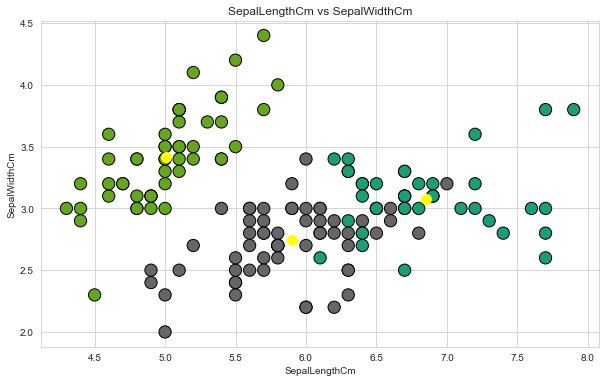

In [83]:
plt.figure(figsize=(10,6))
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'], c=df['cluster'], cmap='Dark2',
edgecolor='k', s=150)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')
plt.title('SepalLengthCm vs SepalWidthCm')
plt.xlabel('SepalLengthCm')
plt.ylabel('SepalWidthCm')
plt.show()